# Titanic - Machine Learning from Disaster

The Titanic ML competition is typically the first challenge beginners complete on the Kaggle platform. The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## 1. Imports

In [128]:
# Data tools
import pandas as pd
import numpy as np
from collections import Counter

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Machine Learning models
from sklearn.linear_model import LogisticRegression

## 2. Load Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

First we can preview the datasets to see what they consist of.

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print('Training set shape: ', train.shape)
print('Test set shape: ', test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


The 'Survived' column is missing in the test DataFrame because that is our target variable. Our goal is to analyze the training set and predict the survival of the passengers in the test set.

And now the sample submission:

In [9]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
gender_submission.shape

(418, 2)

## 3. Data Overview

The data has been split into two groups by Kaggle:

- training set (train.csv)
- test set (test.csv)

The training set will be used to build the models.

The test set will measure how well the model performs on unseen data.

The ```gender_submission.csv``` file is a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

| Variable      | Definition | Key |
| :---        | :---        | :---        |
| survival    | Survival    | 0 = No, 1 = Yes |
| pclass      | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex    | Sex    |   |
| Age    | Age    |   |
| sibsp    | # of siblings / spouses aboard the Titanic    |   |
| parch    | # of parents / children aboard the Titanic    |   |
| ticket    | Ticket number    |   |
| fare    | Passenger fare    |   |
| cabin    | Cabin number    |   |
| embarked    | Port of Embarkation    | C = Cherbourg, Q = Queenstown, S = Southampton  |

## 4. Exploratory Data Analysis (EDA)

EDA is the process of visualizing and analyzing data to derive insights. We can also look at data types, missing data and summary statistics.

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The train dataset has many complete rows, but some are missing a few values, like Age, Cabin, and Embarked.

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [30]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [31]:
# Missing data in test set by columns

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

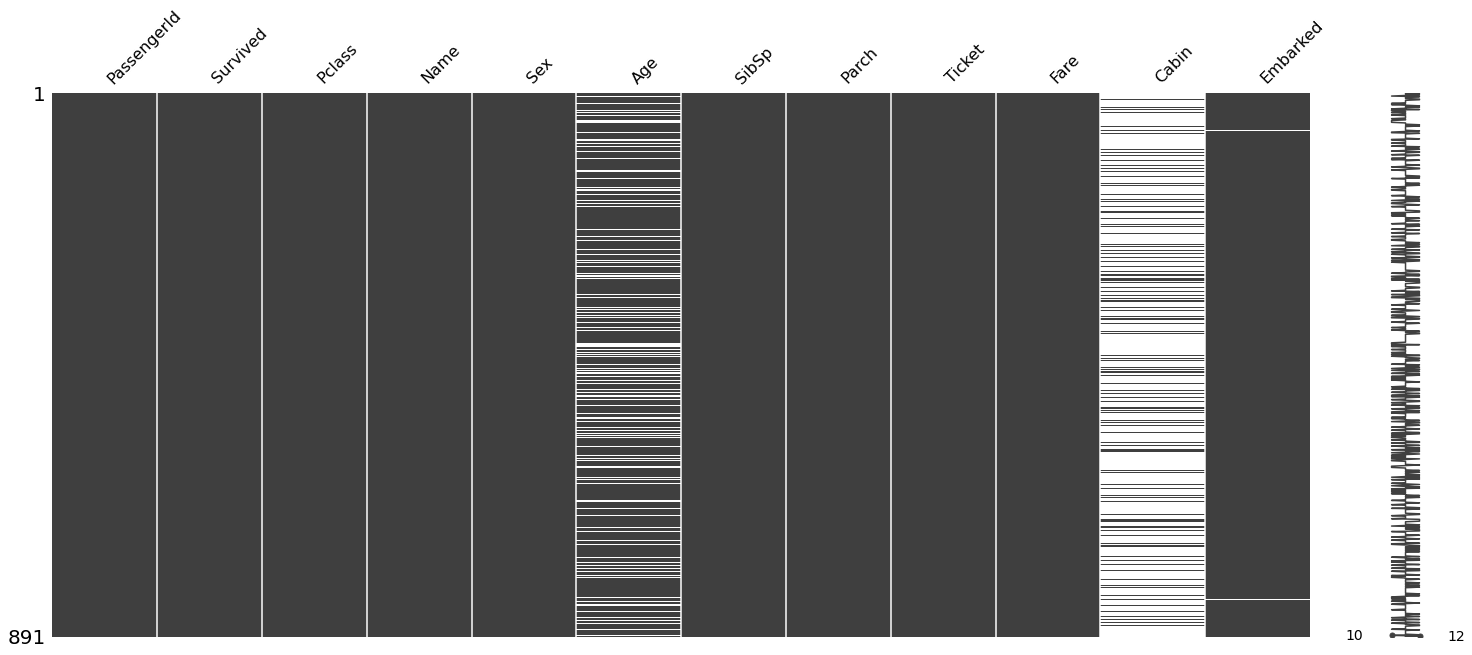

In [37]:
# Missing data in the train set can be visualized with the Missingno package
# - https://pypi.org/project/missingno/

missingno.matrix(train);

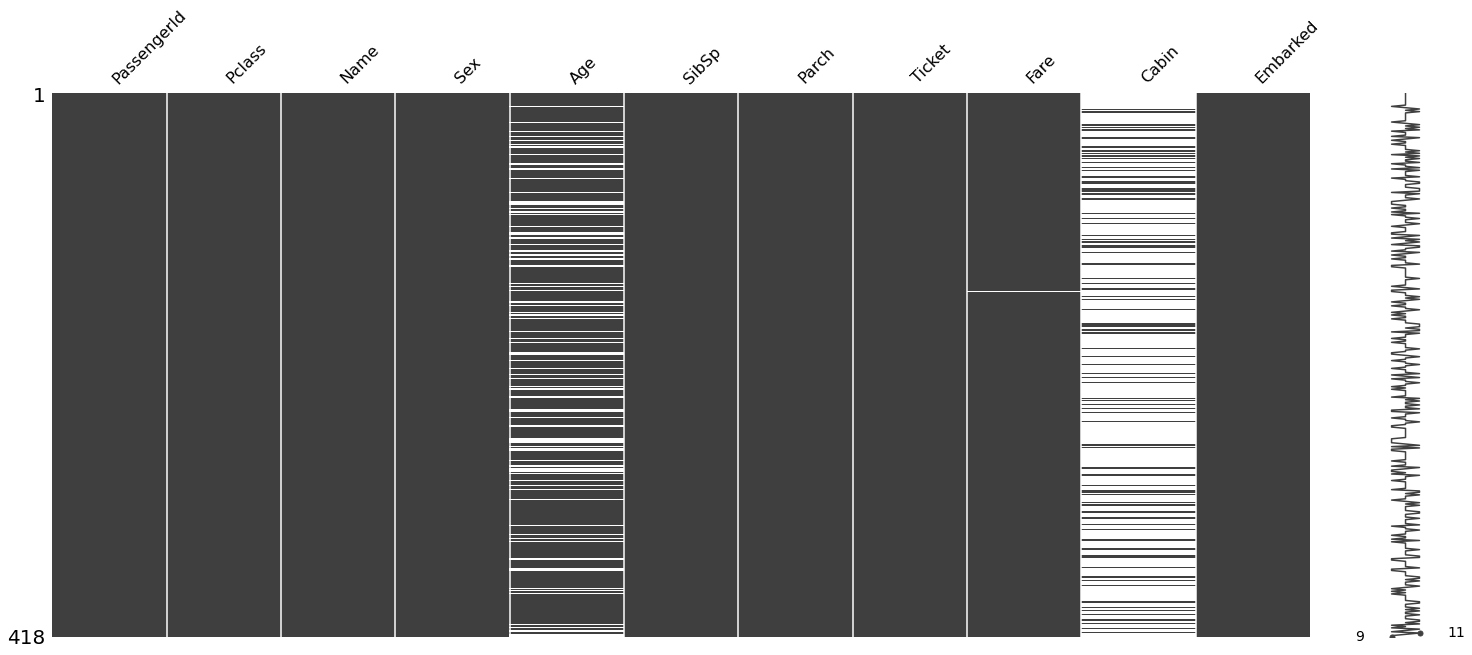

In [39]:
# Missing data in the test set, visualized

missingno.matrix(test);

In [42]:
# summary statistics for the training set

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
# summary statistics for the test set

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Survival Rate by Sex

In [44]:
# Check value counts on Sex

train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [55]:
# Calculate the average survival rate by Sex

train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


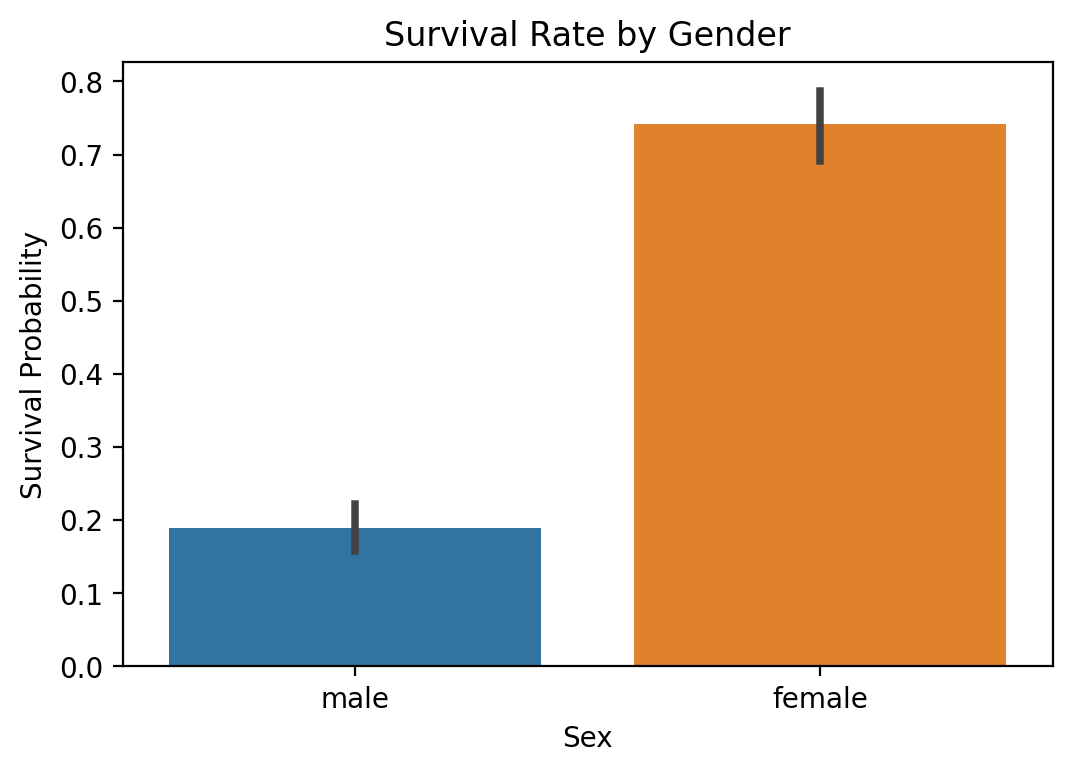

In [62]:
fig = plt.figure(dpi=200)
sns.barplot(x = 'Sex', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Rate by Gender')
plt.show()

### Survival Rate by Passenger Class

In [72]:
# Calculate value counts on Passenger Class

train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [74]:
# Calculate the average survival rate by Passenger Class

train[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


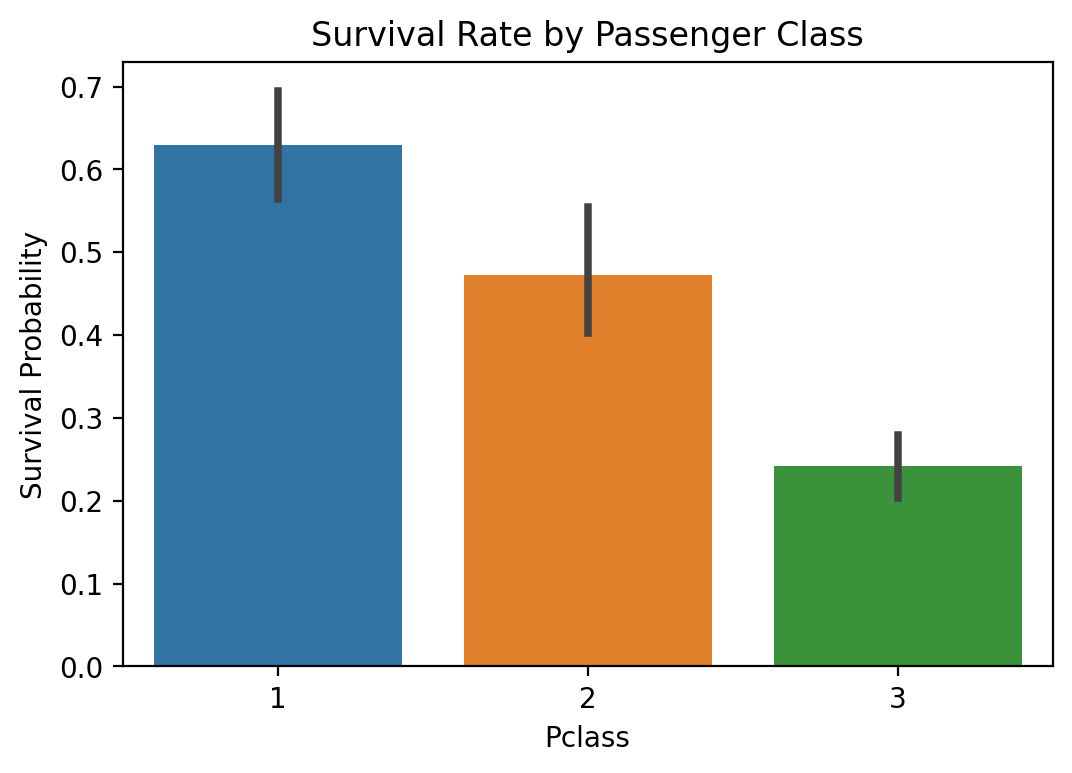

In [75]:
fig = plt.figure(dpi=200)
sns.barplot(x = 'Pclass', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Rate by Passenger Class')
plt.show()

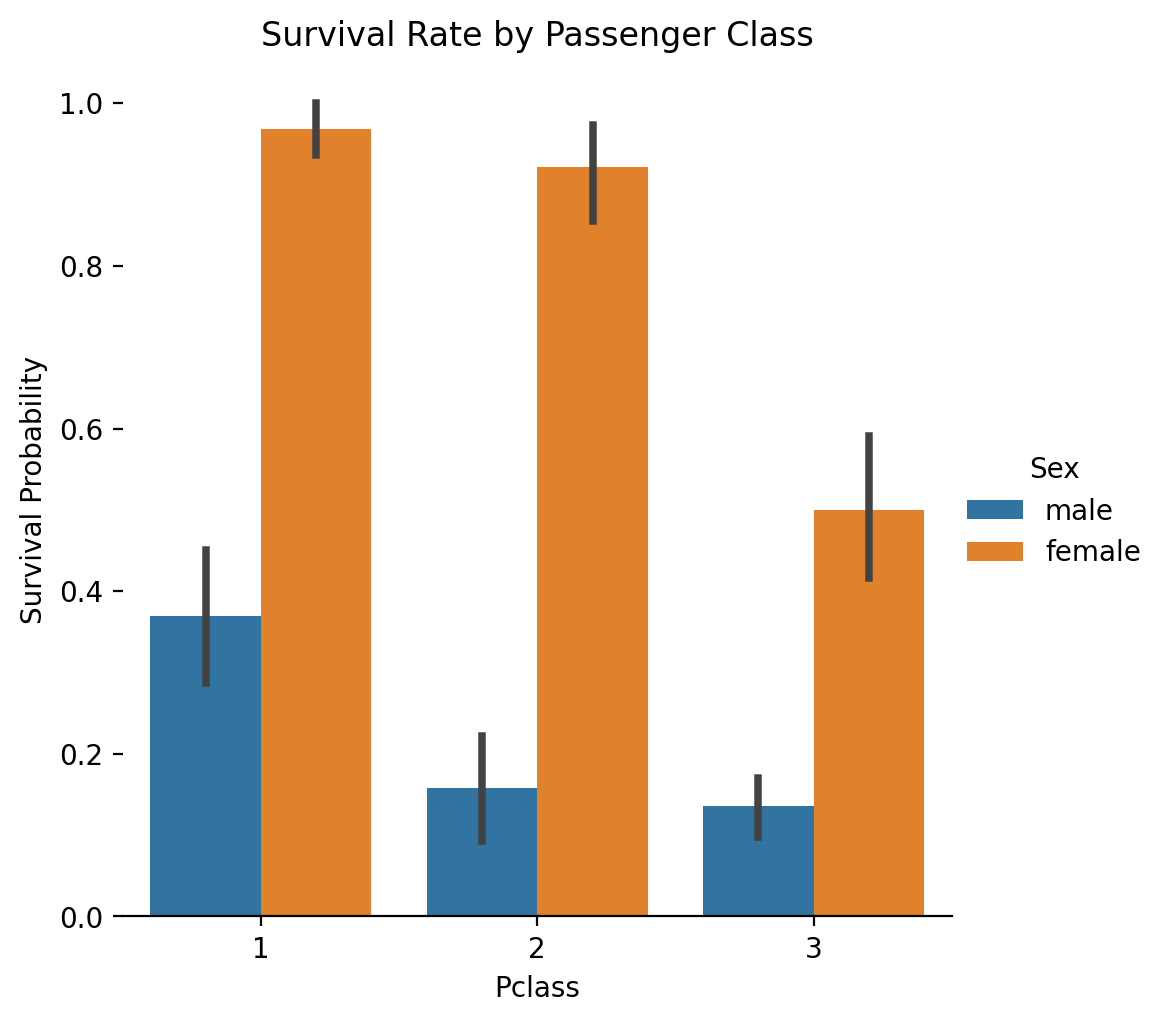

In [88]:
g = sns.catplot(x = 'Pclass', y = 'Survived', data = train, kind='bar', hue='Sex')
g.despine(left=True)
g.fig.set_dpi(200)
plt.ylabel('Survival Probability')
plt.title('Survival Rate by Passenger Class')
plt.show()

In [100]:
# Calculate value counts for Embarked

train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [101]:
# Survival rates by Embarked

train[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


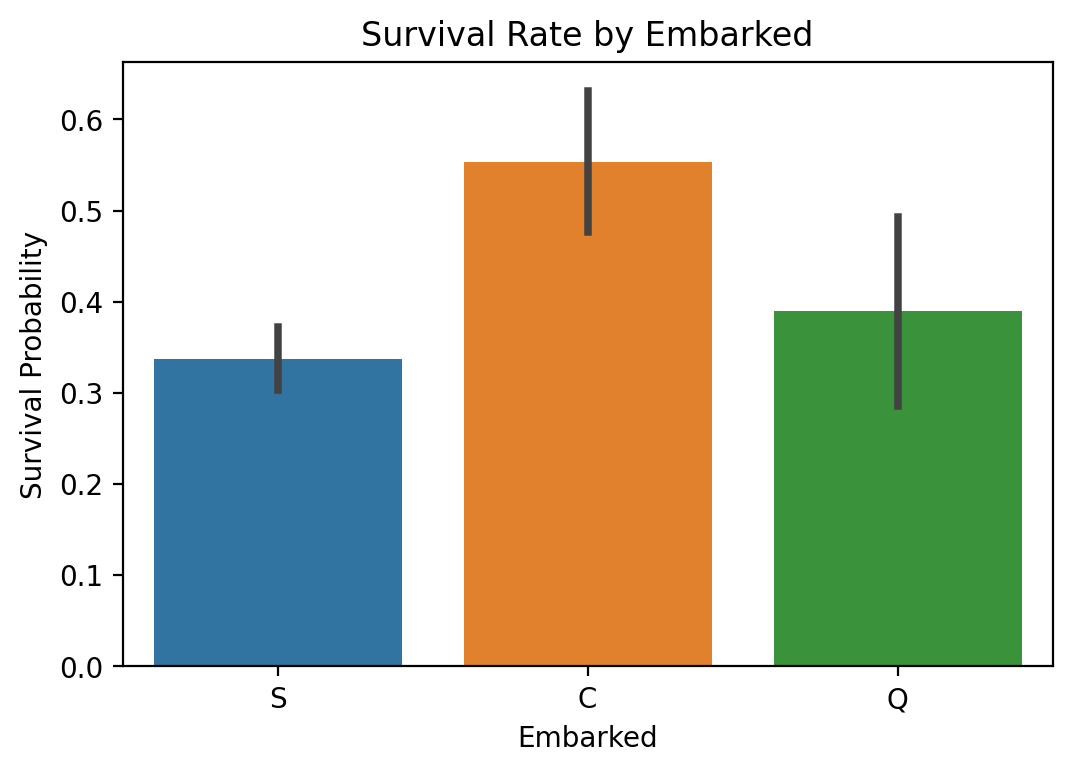

In [102]:
fig = plt.figure(dpi=200)
sns.barplot(x = 'Embarked', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Rate by Embarked')
plt.show()

It would appear strange that the point of departure would affect survival rates but this was more likely due to where first class passengers were originating from.

We can break down which point of embarkation each passenger class came from.

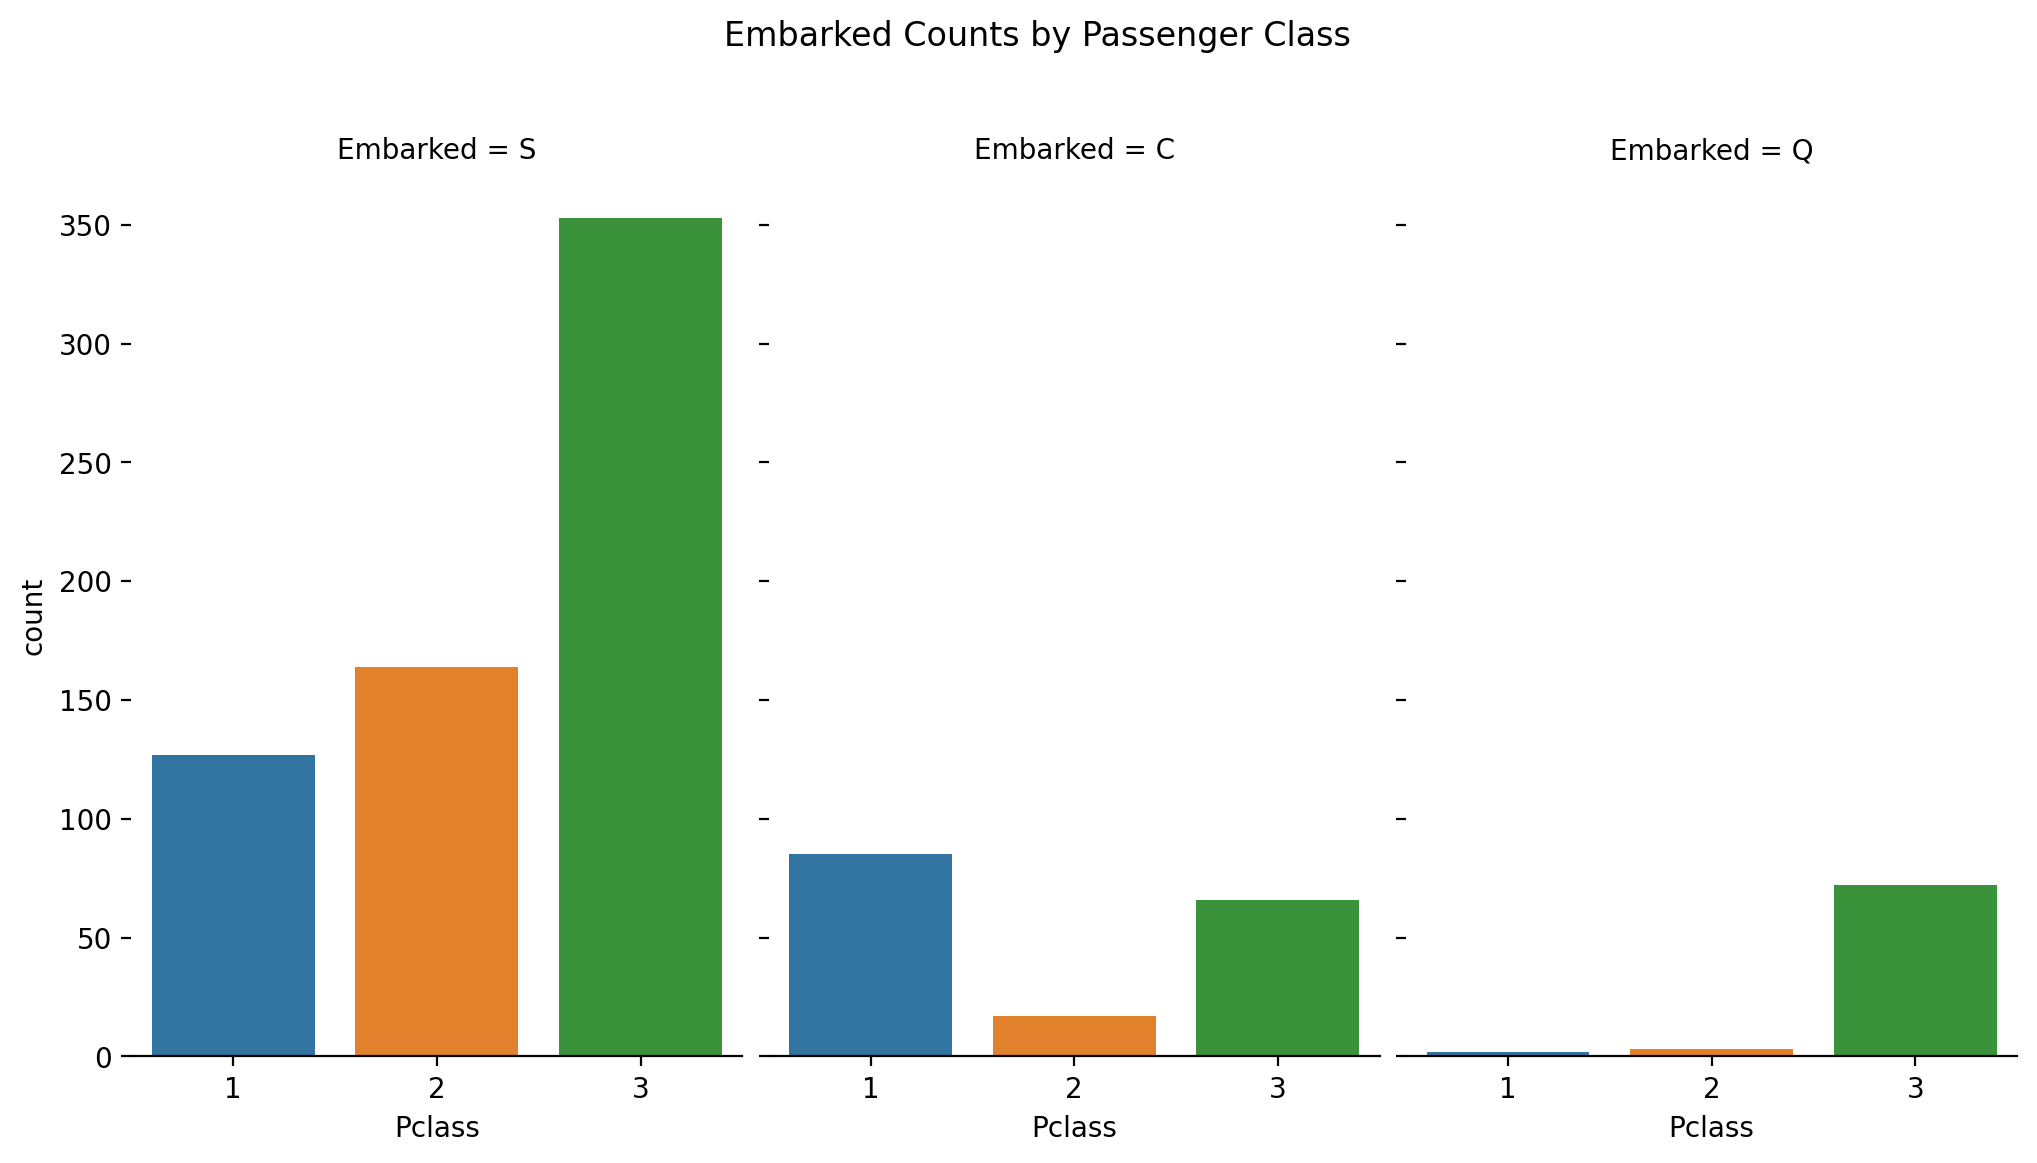

In [124]:
g = sns.catplot(x='Pclass', col='Embarked', data = train, kind='count')
g.despine(left=True)
g.fig.set_dpi(200)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)
g.fig.suptitle('Embarked Counts by Passenger Class')
g.fig.subplots_adjust(top=0.85)
plt.show()

The Cherbourg port had the highest ratio of first-class passengers to we can conclude that C would also have the highest survival rates.

### Numerical Values

The numerical values in the data are SibSp, Parch, Age, and Fare.

We should detect outliers in the numerical data. These can affect the accuracy of model predictions.

In [131]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    
    Based on the Tukey method
    """
    
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])

train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [132]:
# drop the outliers

print("Before drop: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After drop: {} rows".format(len(train)))

Before drop: 891 rows
After drop: 881 rows


### Correlation between Numerical Variables and Survival

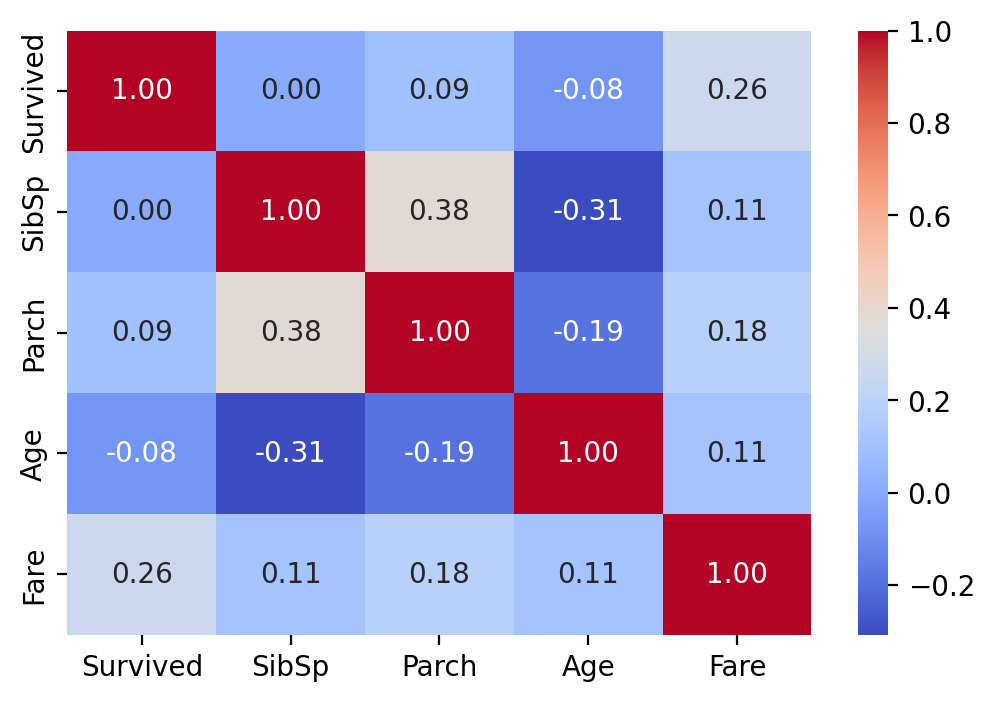

In [138]:
fig = plt.figure(dpi=200)
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

The Fare and Parch seems to be the only features with significant correlation with survivial. This makes sense becaue first-class passengers would have paid a higher fare than others. And those with parents (like kids) would have aligned with "women and children first".

### SibSp Variable

In [140]:
# Calculate counts of SibSp

train['SibSp'].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [142]:
# Calculate average survival rate by SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


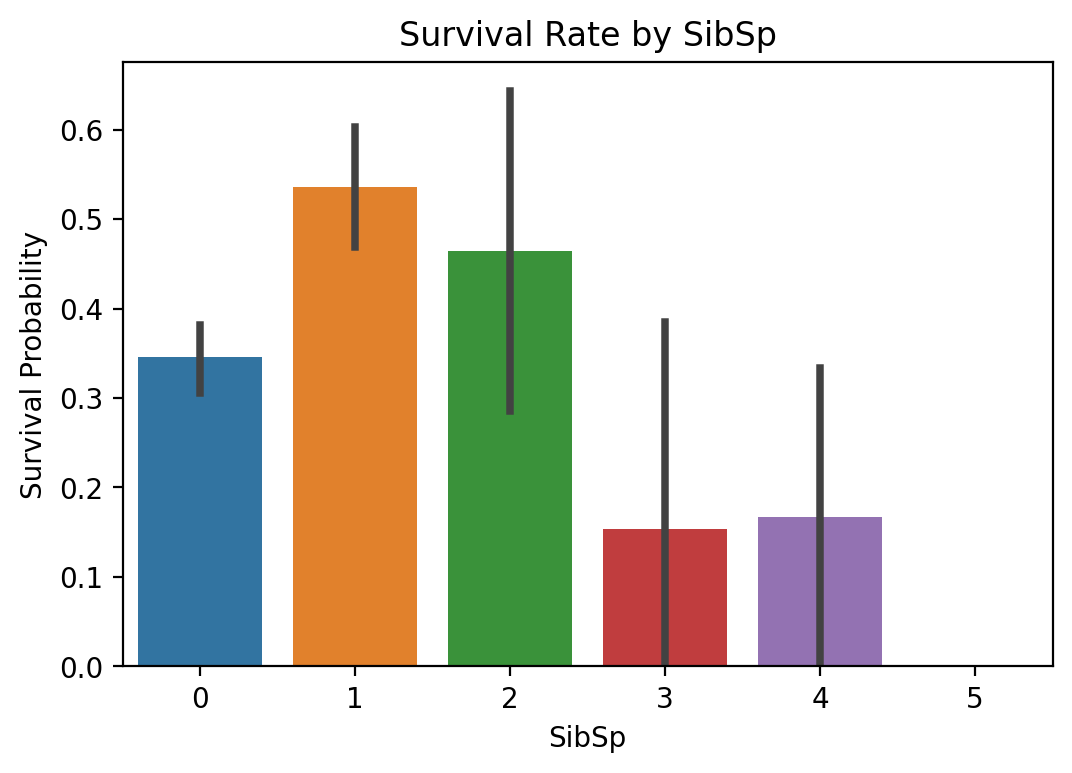

In [143]:
fig = plt.figure(dpi=200)
sns.barplot(x = 'SibSp', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Rate by SibSp')
plt.show()

### Parch Variable

In [144]:
# Calculate counts of Parch

train['Parch'].value_counts(dropna=False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [145]:
# Calculate average survival rate by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


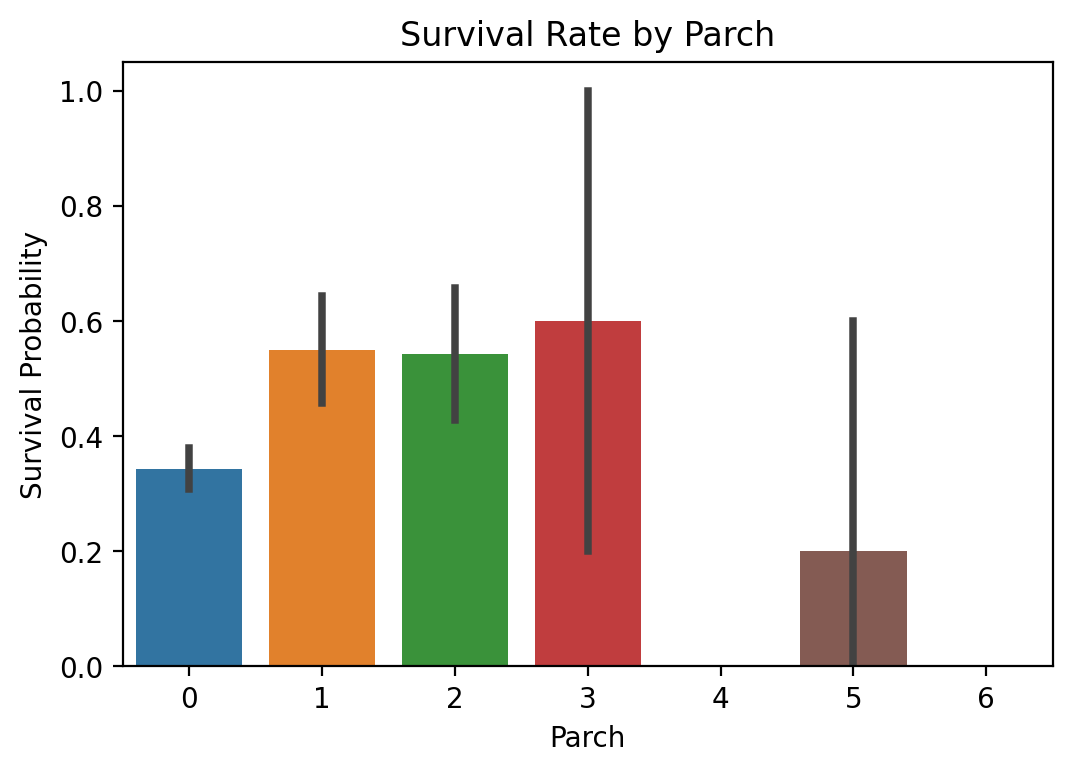

In [146]:
fig = plt.figure(dpi=200)
sns.barplot(x = 'Parch', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Rate by Parch')
plt.show()

### Age Variable

In [147]:
# determine number of null values

train['Age'].isnull().sum()

170

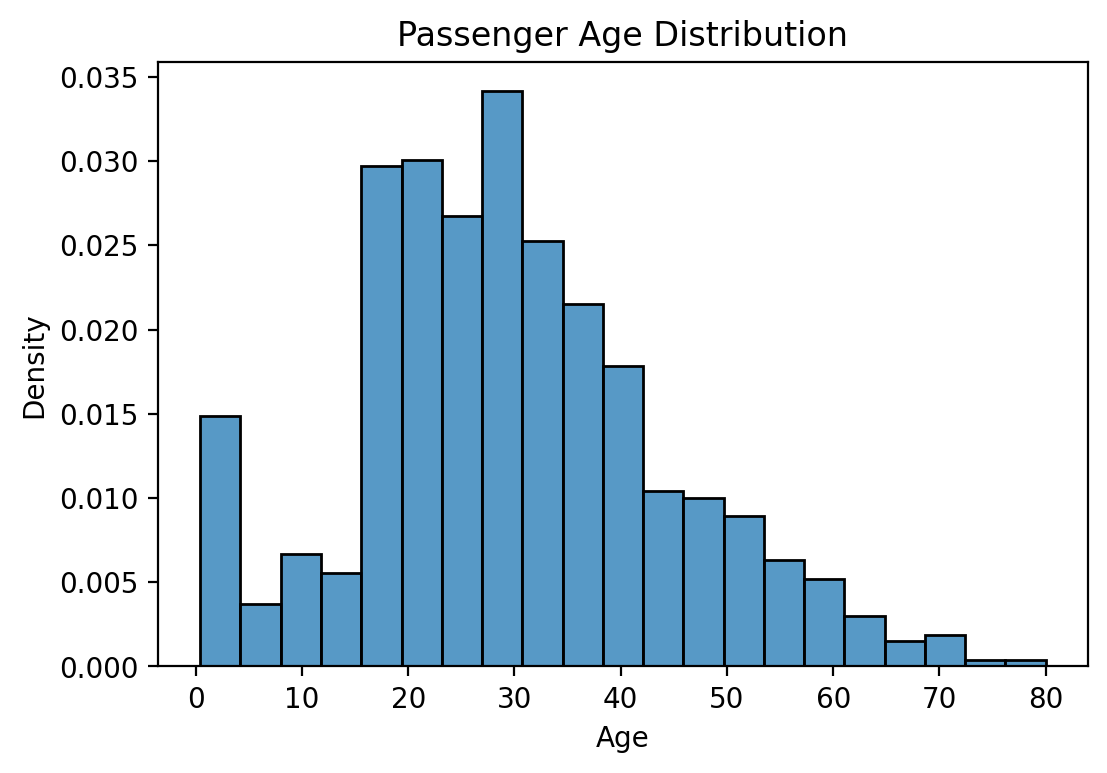

In [158]:
fig = plt.figure(dpi=200)
sns.histplot(train['Age'], stat='density')
plt.title('Passenger Age Distribution')
plt.show()

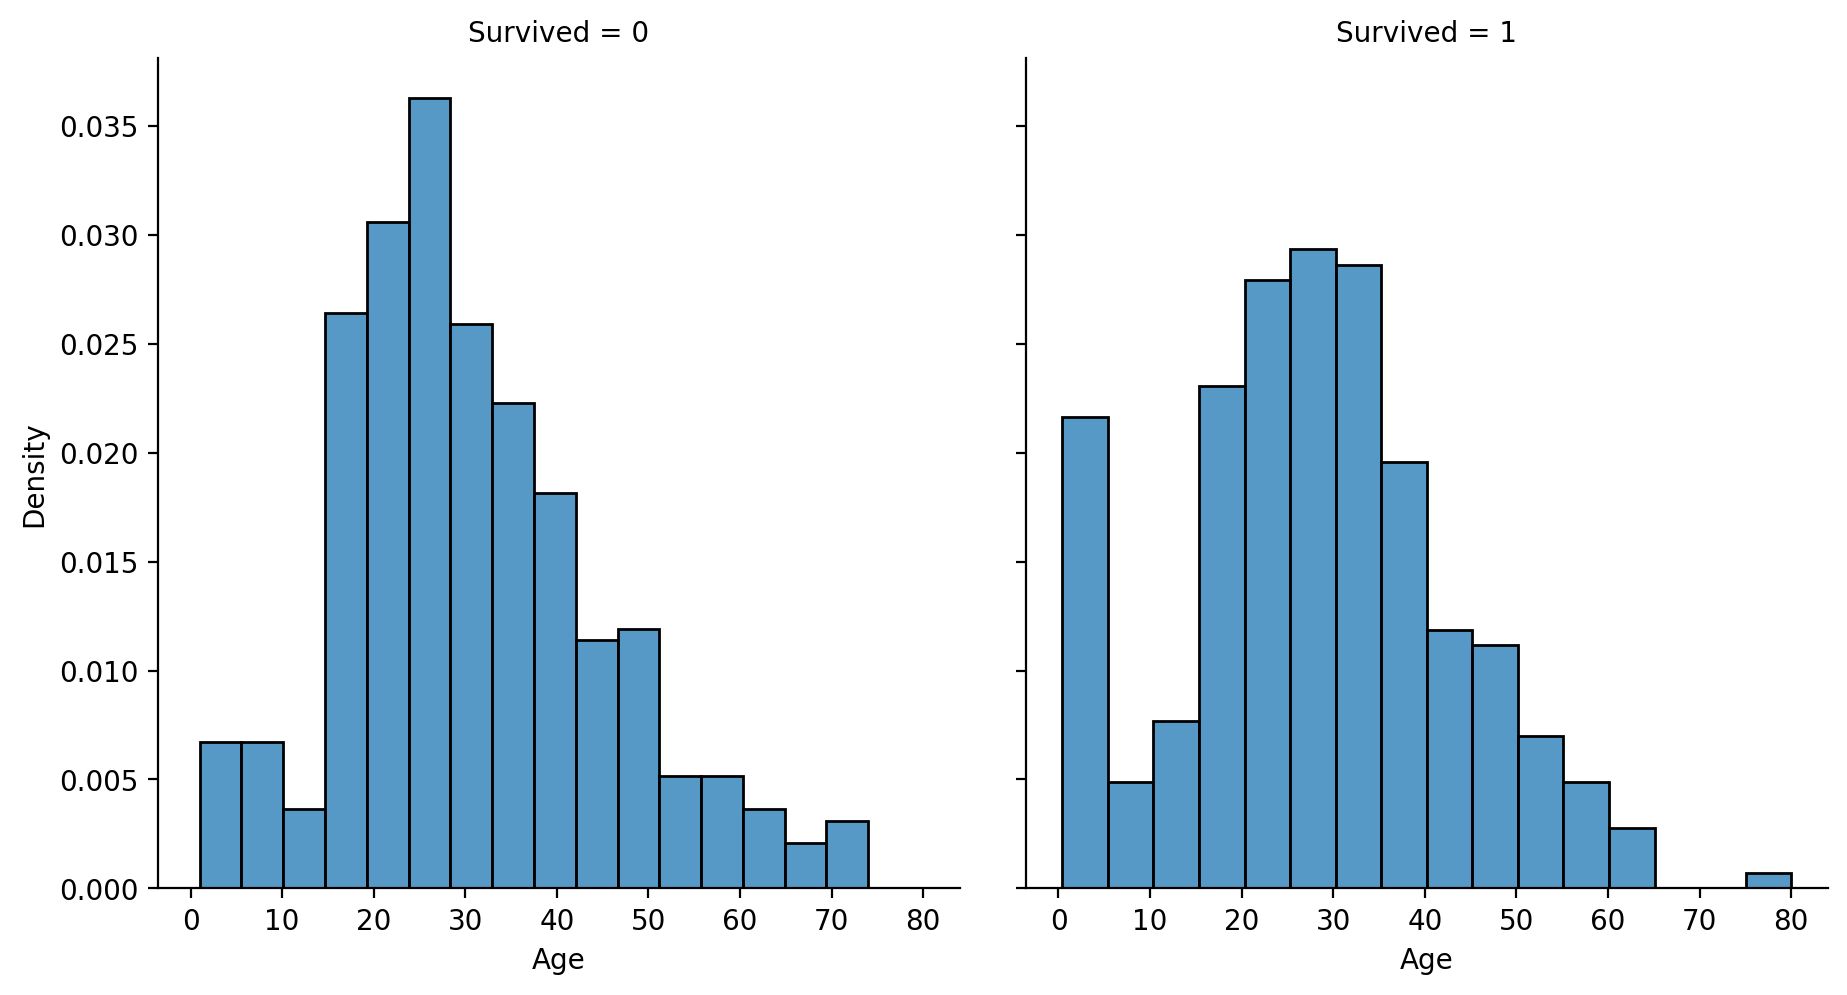

In [167]:
# Age distribution by survival

g = sns.FacetGrid(train, col='Survived')
g.map(sns.histplot, 'Age', stat='density')
g.fig.set_dpi(200)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)
plt.show()

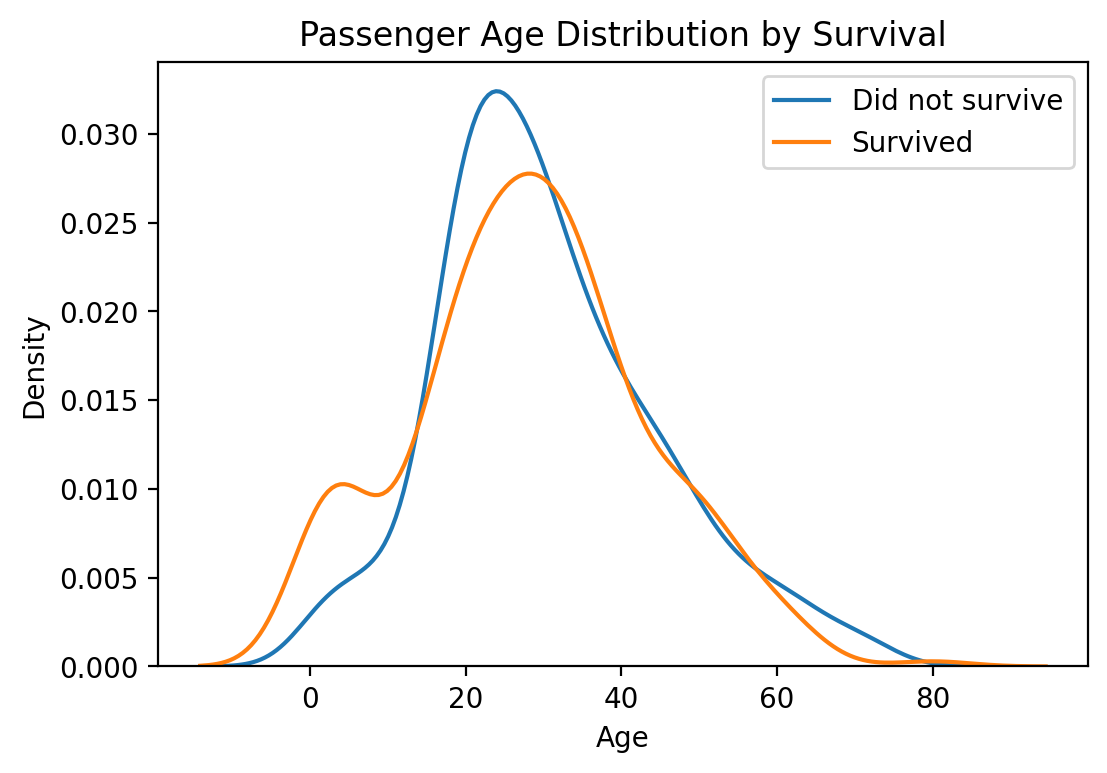

In [166]:
fig = plt.figure(dpi=200)
sns.kdeplot(train['Age'][train['Survived']==0], label='Did not survive')
sns.kdeplot(train['Age'][train['Survived']==1], label='Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')
plt.legend()
plt.show()

From the charts, younger children were more likely to survive than their grandparents.

### Fare Variable

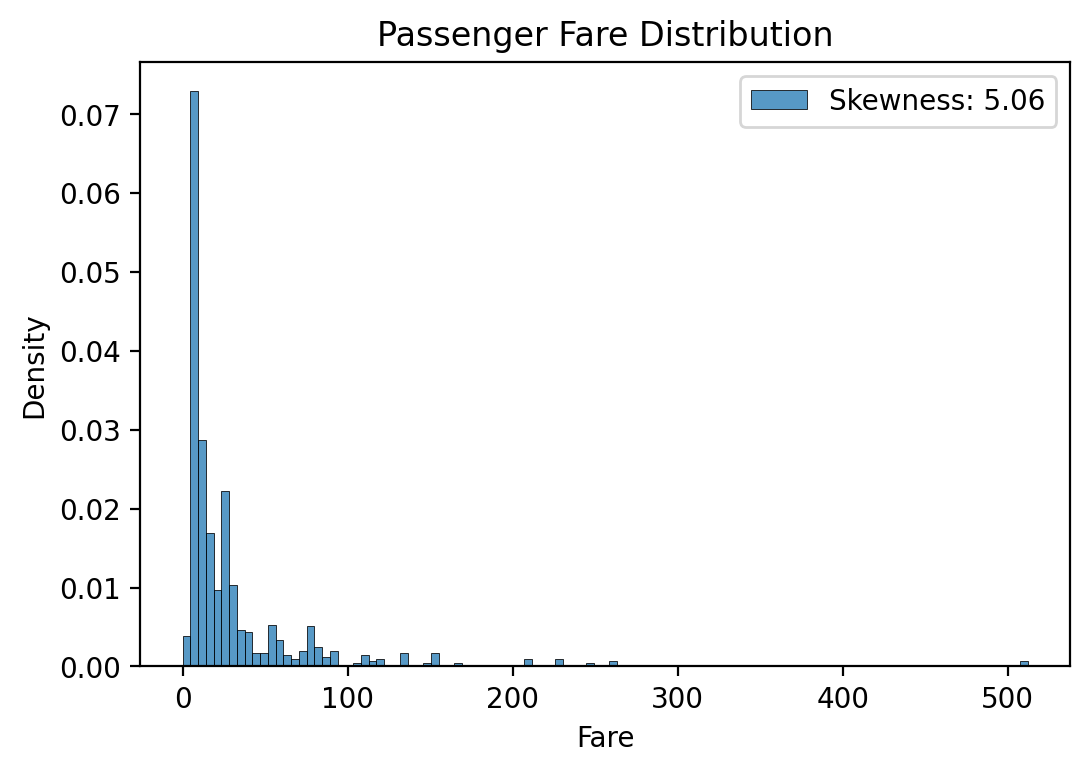

In [174]:
# Passenger fare distribution
fig = plt.figure(dpi=200)
sns.histplot(train['Fare'], stat='density', label='Skewness: %.2f'%(train['Fare'].skew()))
plt.title('Passenger Fare Distribution')
plt.legend()
plt.show()

Skewness can affect model accuracy.

### Summary

1. Women had a higher survival rate over male passengers as they were prioritized during the evacuation.
2. First Class passengers had a higher survival rate than Second and Third class passengers.
3. Younger ages, like children, were also prioritized during the evacuation, causing higher survival rates among that group.